<a href="https://colab.research.google.com/github/susanna-susanna/dau-stpy/blob/main/stpy_5_%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание.**
1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [ ]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [ ]:
iris = load_iris()

In [ ]:
print(iris.DESCR)

In [ ]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
variety = iris.target

In [ ]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size=0.2, random_state=17)

In [ ]:
len(y_test)

30

In [ ]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0,
       2, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
# .T -- transform, чтоб печаталось не в строку, а в столбец

In [ ]:
result

,0,1
0,0,0
1,1,1
2,2,2
3,1,1
4,2,2
5,2,2
6,1,1
7,2,2
8,1,1
9,2,2


In [ ]:
# paсчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, lda.predict(X_test))

0.9666666666666667

Наша модель предсказывает класс достаточно хорошо (если можно такое говорить при малом количестве данных). Почти 1. 
Значит, вероятность того, что наша модель предскажет/определит правильно класс при поступлении новых каких-то данных по длине и ширине чашелистников и лепестков (или каких-то других ботанических характеристик) какого-то нового цветка почти 1.

In [ ]:
# коэффициенты дискриминатных линий
print(lda.coef_)

data.head(2)

[[  7.50783712   9.28489681 -16.84103833 -20.09720007]
 [ -1.76459252  -4.13731107   4.89553045   4.0456272 ]
 [ -6.68468126  -6.26040608  14.03260423  18.58947742]]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


Если я правильно понимаю, то в 0 и 2 классах (Iris-Setosa и Iris-Virginica соответственно) длина и ширина лепестков влияют значительнее на определение класса, чем длина и ширина чашелистников.
В классе Iris-Versicolour длина чашелистника менее всего влияет на определение класса (принадлежность к этому классу)

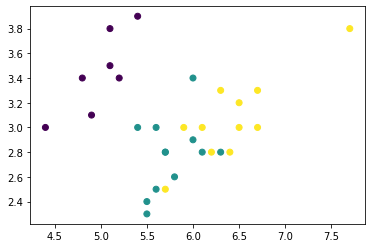

In [ ]:
# Визуализируйт предсказания для тестовой выборки и центры классов
# Отбросить целевую переменную и оставьте только два признака - sepal_length и sepal_width

plt.scatter(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], c=lda.predict(X_test))

In [ ]:
# посмотрим на наши центроиды
lda.means_

array([[5.00930233, 3.4255814 , 1.46744186, 0.24883721],
       [5.9974359 , 2.76923077, 4.25641026, 1.32564103],
       [6.64210526, 2.95263158, 5.60263158, 2.02368421]])

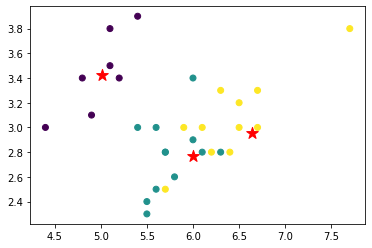

In [ ]:
# сам scatter plot
# plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
plt.scatter(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], c=lda.predict(X_test))
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

Что-то мои предсказанные классы как-то смешались.

Посмотрю классы и центры на фактических классах


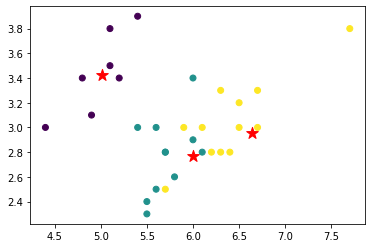

In [ ]:
# сам scatter plot
# plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
plt.scatter(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], c=y_test)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

Разница в одну точку) Наверное, это и есть те ~3,5% ошибки.

Я не понимаю, почему центр одного из класса (здесь цвета, похожего на цвет морской волны) визуально ближе к "жёлтому классу"?  Вероятно, из-за точки (6,0; 3,4)? 

In [ ]:
from sklearn.cluster import KMeans
k_inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    k_inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

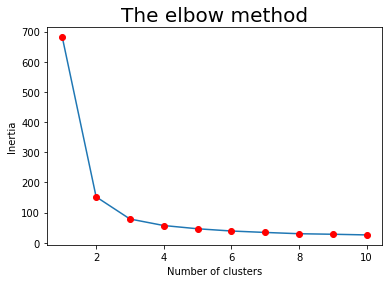

In [ ]:
plt.plot(range(1, 11), k_inertia)
plt.plot(range(1, 11), k_inertia ,'ro')
plt.title('The elbow method', size=20)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Локоть говорит, что 2 кластера вполне подйдет для этой задачи. 

Очень слабо возможно разделить на 3 кластера

In [ ]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(data)
X_scaled

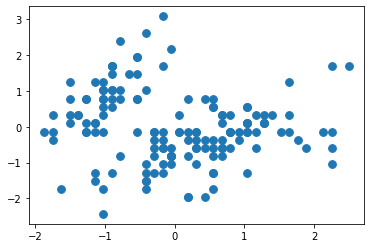

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

Только чуть-чуть неточно построена визуализация, надо было так:
```
plt.scatter(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], c=lda.predict(X_test))
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
```
разделяющую двух мерную линию для 3 классов у вас, конечно, не получится построить :)

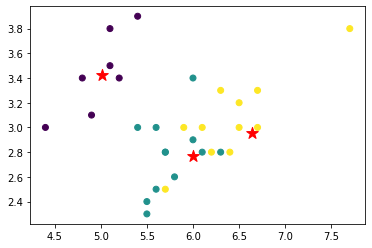

In [ ]:
plt.scatter(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], c=lda.predict(X_test))
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# явно указываем количество кластеров. Попробуем сделать для начала 2 кластера
kmeans_2 = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters_2 = kmeans_2.fit_predict(X_scaled)
clusters_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

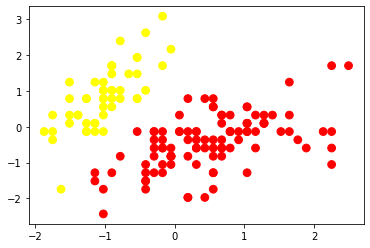

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters_2, s=60)

In [ ]:
#Теперь попробую разделить на 3 кластера и посмотреть
kmeans_3 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans_3.fit_predict(data)

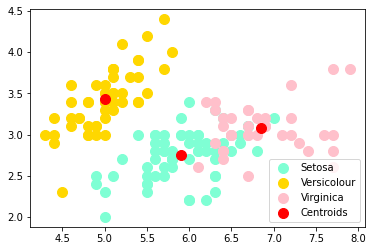

In [ ]:
#Visualising the clusters
plt.scatter(data.values[y_kmeans == 0, 0], data.values[y_kmeans == 0, 1], s = 100, c = '#7FFFD4', label = 'Setosa')
plt.scatter(data.values[y_kmeans == 1, 0], data.values[y_kmeans == 1, 1], s = 100, c = '#FFD700', label = 'Versicolour')
plt.scatter(data.values[y_kmeans == 2, 0], data.values[y_kmeans == 2, 1], s = 100, c = '#FFC0CB', label = 'Virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

Итого))

Метод локтя показал, что у нас 2 кластера (если я правильно выразилась) 

Я попыталась разделить цветы на 2 (по совету локтя) и  на 3 (своим "экспертным" мнением:))) кластера. 

И делением на 2 кластера, и делением на 3 калстера визуализация показывает, что Versicolour по своим характеристикам стоит особняком (за исключением одной точки 4,5; 2,4)-- скорее всего, отдельный вид отряда/класса. 

А Setosa и Virginica не могут отчётливо разделиться. Вероятно, у цветков этих видов очень много схожих ботанических признаков. Вполне возможно, что Setosa и Virginica -- не отдельные виды, а подвиды одного ботанического/биологического вида 

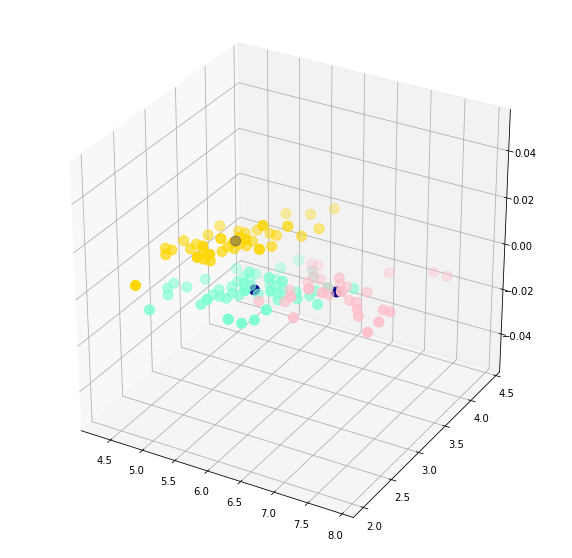

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(data.values[y_kmeans == 0, 0], data.values[y_kmeans == 0, 1], s = 100, c = '#7FFFD4', label = 'Setosa')
plt.scatter(data.values[y_kmeans == 1, 0], data.values[y_kmeans == 1, 1], s = 100, c = '#FFD700', label = 'Versicolour')
plt.scatter(data.values[y_kmeans == 2, 0], data.values[y_kmeans == 2, 1], s = 100, c = '#FFC0CB', label = 'Virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:,1], s = 100, c = '#00008B', label = 'Centroids')
# plt.show()

#Полезные ссылки

[Colab с занятия](https://colab.research.google.com/drive/1N7KR2iG2H0bv5jDSQTRzVGmInSyjNURU#scrollTo=-ppToJrUWoJ0)

[Только в Режиме Инкогнито!! Смотри Colab с занятия](https://towardsdatascience.com/)  

[K-Means Clustering of Iris Dataset](https://www.kaggle.com/code/khotijahs1/k-means-clustering-of-iris-dataset)

[Colors in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colors.html)

https://stackoverflow.com/questions/56496692/typeerror-help-plt-scatter-reading-my-csv-as-true-false-rather-than-numerical